<a href="https://colab.research.google.com/github/abhilb/mycolab/blob/main/Sign_language_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sign Language Classifier

In [3]:
#@title Imports

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

from tensorflow import keras

In [4]:
#@title Download the dataset
! pip install kaggle
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/Data/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download ardamavi/27-class-sign-language-dataset
! unzip /content/27-class-sign-language-dataset.zip

100% 1.06G/1.06G [00:20<00:00, 38.7MB/s]
100% 1.06G/1.06G [00:20<00:00, 55.4MB/s]
Archive:  /content/27-class-sign-language-dataset.zip
  inflating: X.npy                   
  inflating: Y.npy                   


In [57]:
#@title Load the dataset

class DataGenerator():
  def __init__(self, batch_size = 16):
    self.X = np.load('X.npy', mmap_mode='r')
    self.y = np.load('Y.npy', mmap_mode='r')
    self.batch_size = batch_size
    print(f"Shape of X: {self.X.shape} and Shape of y: {self.y.shape}")
    
    enc = OrdinalEncoder()
    self.y = enc.fit_transform(self.y)

  def get_data(self):
    while True:
      idx = np.random.randint(0, self.X.shape[0])
      yield self.X[idx], self.y[idx]

In [60]:
dg = DataGenerator()

Xs = []
ys = []

for x, y in dg.get_data():
  Xs.append(x)
  ys.append(y)
  if len(ys) > 16:
    break
print(f"Length of Xs = {len(Xs)} and ys = {len(ys)}")

Shape of X: (22801, 128, 128, 3) and Shape of y: (22801, 1)
Length of Xs = 17 and ys = 17


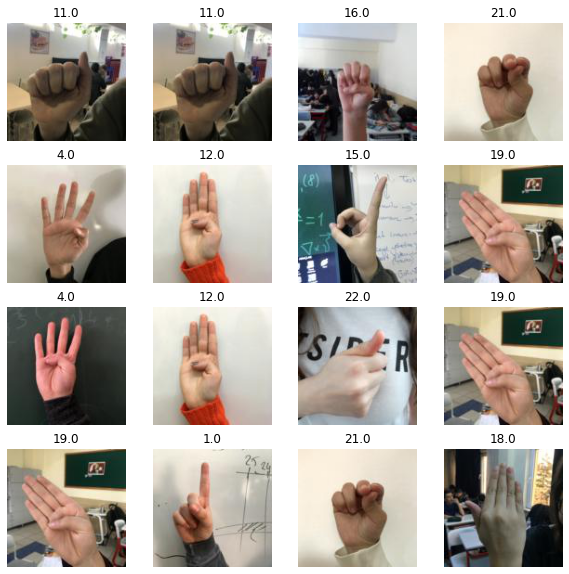

In [61]:
#@title Display some of the images from the dataset
f, axes = plt.subplots(4, 4, figsize=(10, 10))
for ax in axes.flatten():
  idx = np.random.randint(0, 16)
  img = Xs[idx]
  label = ys[idx][0]
  ax.imshow(img)
  ax.axis('off')
  ax.set_title(label)
plt.show()

In [64]:
classes = 27
input_shape = (128, 128, 3)
xspec = tf.TensorSpec(shape=[128, 128, 3], dtype=tf.int32, name="Image")
yspec = tf.TensorSpec(shape=[1], dtype=tf.float32, name="Label")
train_dataset = tf.data.Dataset.from_generator(dg.get_data, 
                                               output_signature = (xspec, yspec))
train_dataset = train_dataset.batch(64)


# Create a model and train it on the augmented image data
inputs = tf.keras.Input(shape=input_shape)
x = tf.keras.layers.Rescaling(1.0 / 255)(inputs)
outputs = tf.keras.applications.ResNet50(
    weights=None, input_shape=input_shape, classes=classes
)(x)
model = tf.keras.Model(inputs, outputs)
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy")
history = model.fit(train_dataset, steps_per_epoch=5, epochs=10)

Epoch 1/10
5/5 [==============================] - 93s 17s/step - loss: 6.7201
Epoch 2/10
5/5 [==============================] - 86s 17s/step - loss: 5.9636
Epoch 3/10
5/5 [==============================] - 87s 17s/step - loss: 4.5898
Epoch 4/10
5/5 [==============================] - 84s 17s/step - loss: 4.1558
Epoch 5/10
5/5 [==============================] - 87s 17s/step - loss: 3.6553
Epoch 6/10
5/5 [==============================] - 84s 17s/step - loss: 3.4484
Epoch 7/10
5/5 [==============================] - 84s 17s/step - loss: 3.6690
Epoch 8/10
5/5 [==============================] - 85s 17s/step - loss: 3.5167
Epoch 9/10
5/5 [==============================] - 84s 17s/step - loss: 3.5233
Epoch 10/10
5/5 [==============================] - 85s 17s/step - loss: 3.8642
